
1.Introduction:
    This assignment will help you to consolidate the concepts learnt in the session.


Hint:import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetimeimport sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorrplt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('C:/Users/Downloads/sp500/data_stocks.csv')
df.head()

Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1.NASDAQ.AAPL
2.NASDAQ.ADP
3.NASDAQ.CBOE
4.NASDAQ.CSCO
5.NASDAQ.EBAY

NOTE:The solution shared through Github should contain the source code used and the screenshot of the output.


In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df['DATE'].dtypes

dtype('int64')

In [4]:
# Converting df['DATE'] into Date Time 
df['DATE'] = pd.to_datetime(df['DATE'], unit='s')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
df['DATE'].dtypes

dtype('<M8[ns]')

In [6]:
df.set_index('DATE' ,inplace=True)

In [7]:
df1 = df[['NASDAQ.AAPL']].copy()

In [8]:
print(df1.head())
print(df1.tail())


                     NASDAQ.AAPL
DATE                            
2017-04-03 13:30:00     143.6800
2017-04-03 13:31:00     143.7000
2017-04-03 13:32:00     143.6901
2017-04-03 13:33:00     143.6400
2017-04-03 13:34:00     143.6600
                     NASDAQ.AAPL
DATE                            
2017-08-31 19:56:00       164.11
2017-08-31 19:57:00       164.12
2017-08-31 19:58:00       164.01
2017-08-31 19:59:00       163.88
2017-08-31 20:00:00       163.98


In [9]:
df1.count()

NASDAQ.AAPL    41266
dtype: int64

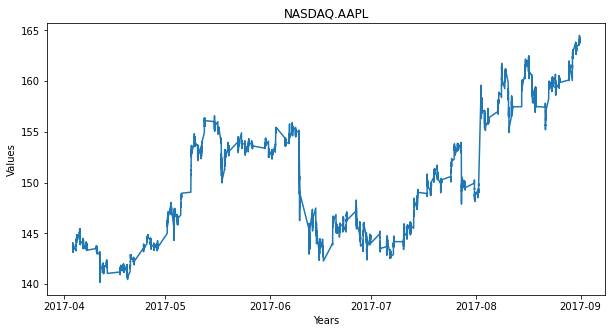

In [10]:
plt.figure(figsize=(10,5), facecolor='White')
plt.plot(df1)
plt.title("NASDAQ.AAPL")
plt.xlabel("Years")
plt.ylabel("Values")
plt.show()

In [11]:
df1.describe()

,NASDAQ.AAPL
count,41266.000000
mean,150.453566
std,6.236826
min,140.160000
25%,144.640000
50%,149.945000
75%,155.065000
max,164.510000


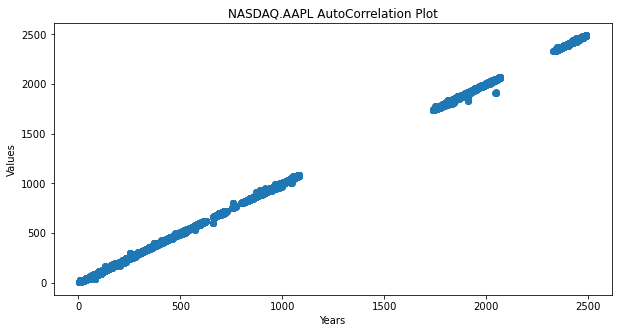

In [12]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10,5), facecolor='White')
lag_plot(df, lag=5)
plt.title("NASDAQ.AAPL AutoCorrelation Plot")
plt.xlabel("Years")
plt.ylabel("Values")
plt.show()

In [13]:
# Testing for stationary Data:

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df1['NASDAQ.AAPL'])

In [14]:
def adfuller_test(stocks):
    result=adfuller(stocks)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("We are rejecting the Null Hypothesis. Data has no unit root and is stationary")
    else:
        print("We are accepting the Null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(df1['NASDAQ.AAPL'])

ADF Test Statistic : -0.9128532997926665
p-value : 0.7837101772613868
#Lags Used : 31
Number of Observations Used : 41234
We are accepting the Null hypothesis, time series has a unit root, indicating it is non-stationary 


In [92]:
# If the data is Non-stationary. What we need to do to make the data Stationary

In [16]:
# We are doing "Differencing"
# We are shifting our data
df1['NASDAQ.AAPL'].shift(1) # We can see that, the data shifted to one position. 
# The first row value is shifted to second row

DATE
2017-04-03 13:30:00         NaN
2017-04-03 13:31:00    143.6800
2017-04-03 13:32:00    143.7000
2017-04-03 13:33:00    143.6901
2017-04-03 13:34:00    143.6400
                         ...   
2017-08-31 19:56:00    164.1400
2017-08-31 19:57:00    164.1100
2017-08-31 19:58:00    164.1200
2017-08-31 19:59:00    164.0100
2017-08-31 20:00:00    163.8800
Name: NASDAQ.AAPL, Length: 41266, dtype: float64

In [19]:
df1['NASDAQ.AAPL difference'] = df['NASDAQ.AAPL']-df['NASDAQ.AAPL'].shift(1)

In [20]:
df1.head()

,NASDAQ.AAPL,NASDAQ.AAPL difference
DATE,,
2017-04-03 13:30:00,143.6800,NaN
2017-04-03 13:31:00,143.7000,0.0200
2017-04-03 13:32:00,143.6901,-0.0099
2017-04-03 13:33:00,143.6400,-0.0501
2017-04-03 13:34:00,143.6600,0.0200


In [23]:
# Again we passing our data with dicky fuller test
adfuller_test(df1['NASDAQ.AAPL difference'].dropna())

ADF Test Statistic : -35.73774148340149
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 41234
We are rejecting the Null Hypothesis. Data has no unit root and is stationary


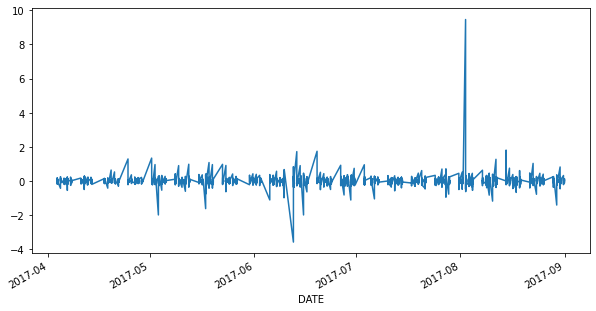

In [24]:
plt.figure(figsize=(10,5), facecolor='White')
df1['NASDAQ.AAPL difference'].plot()
plt.show()

In [ ]:
# Finding the AutoCorrelation

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

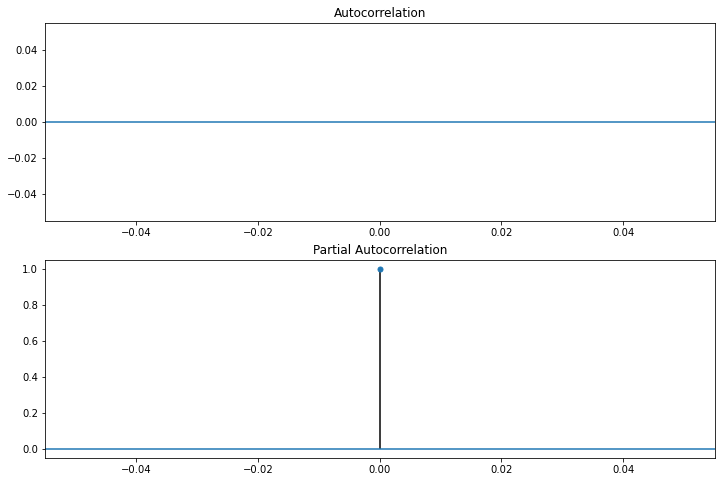

In [26]:
fig = plt.figure(figsize=(12,8))
# Auto Corelation Plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['NASDAQ.AAPL difference'],lags = 5, ax=ax1)
# Partial Auto Corelation Plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['NASDAQ.AAPL difference'],ax=ax2)

In [27]:
# Training and Testing Set
X = df1.values
len(X)
train_data = df1[0: int(len(df1)*0.7)]
test_data = df1[int(len(df1)*0.7):]
print("The Train Data: ", train_data.shape)
print("The Test Data: ", test_data.shape)

The Train Data:  (28886, 2)
The Test Data:  (12380, 2)


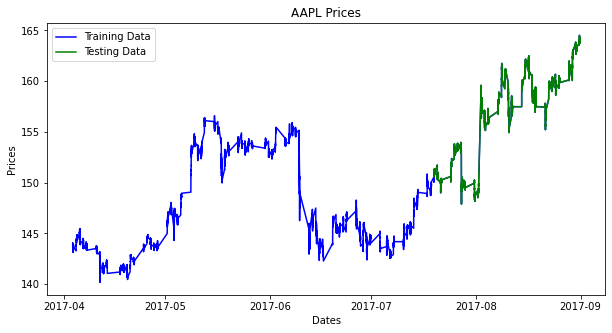

In [56]:
plt.figure(figsize=(10,5), facecolor='White')
plt.plot(df1['NASDAQ.AAPL'], 'blue', label='Training Data')
plt.plot(test_data['NASDAQ.AAPL', 'green', label='Testing Data')
plt.title('AAPL Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [49]:
from statsmodels.tsa.arima_model import ARIMA

import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [52]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [ ]:
train_ar = train_data['NASDAQ.AAPL'].values
test_ar = test_data['NASDAQ.AAPL'].values

history = [x for x in test_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(4,1,4))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

<class 'list'>
predicted=163.980942, expected=150.620000
predicted=150.961573, expected=150.645100
predicted=150.661318, expected=150.650000
predicted=150.547463, expected=150.590100
predicted=150.877195, expected=150.620000
predicted=150.642715, expected=150.630000
predicted=150.463586, expected=150.550000
predicted=150.591917, expected=150.560000
predicted=150.691286, expected=150.589000
predicted=150.448008, expected=150.600000
predicted=150.542501, expected=150.609300
predicted=150.758700, expected=150.590000
predicted=150.622628, expected=150.575000
predicted=150.468829, expected=150.580000
predicted=150.595519, expected=150.600000
predicted=150.685917, expected=150.634500
predicted=150.591370, expected=150.637000
predicted=150.569310, expected=150.700000
predicted=150.762353, expected=150.750000
predicted=150.785204, expected=150.769000
predicted=150.698056, expected=150.775300
predicted=150.765326, expected=150.780000
predicted=150.848567, expected=150.770000
predicted=150.75387

In [ ]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')